# **80 Cereals Analysis**

## **Which Cereal is Healthy for Human Consumption**



This is a multivariate dataset describing seventy-seven commonly available breakfast cereals with sixteen features, based on the information now available on the newly-mandated food and drugs administration (F&DA) food label.
*   What are you getting when you eat a bowl of cereal?
*   Can you get a lot of fiber without a lot of calories?
*   Can you describe what cereals are displayed on high, low, and middle shelves?

The good news is that none of the cereals for which we collected data had any cholesterol, and manufacturers rarely use artificial sweeteners and colors, nowadays. (http://lib.stat.cmu.edu/datasets/1993.expo/)

**Content**

Fields in the dataset:

Name: Name of cereal

mfr: Manufacturer of cereal
A = American Home Food Products; G = General Mills; K = Kelloggs; N = Nabisco; P = Post; Q = Quaker Oats; R = Ralston Purina;

type:
cold;
hot;

calories: calories per serving

protein: grams of protein

fat: grams of fat

sodium: milligrams of sodium

fiber: grams of dietary fiber

carbo: grams of complex carbohydrates

sugars: grams of sugars

potass: milligrams of potassium

vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended

shelf: display shelf (1, 2, or 3, counting from the floor)

weight: weight in ounces of one serving

cups: number of cups in one serving

rating: a rating of the cereals (Possibly from Consumer Reports?)

(https://www.kaggle.com/code/mashhar/data-preprocessing-visualization-model-learning)

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load data

cereal_df = pd.read_csv("/content/drive/My Drive/Hamoye Internship/cereal.csv")
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


### Data Cleaning and Preprocessing

In [3]:
cereal_df.shape

(77, 16)

In [4]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
cereal_df.duplicated().sum()

0

In [7]:
# Rename the manufacturer's name to the correct name for easy analysis

cereal_df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [8]:
cereal_df["mfr"].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [9]:
cereal_df["mfr"] = cereal_df["mfr"].replace(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], ['Nabisco', 'Quaker Oats', 'Kelloggs', 'Ralston Purina', 'General Mills', 'Post', 'American Home Food Products'])

In [10]:
cereal_df["mfr"].unique()

array(['Nabisco', 'Quaker Oats', 'Kelloggs', 'Ralston Purina',
       'General Mills', 'Post', 'American Home Food Products'],
      dtype=object)

In [11]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


**Exploratory Data Analysis**

In [24]:
# Let's explore the distribution of each of the variables particularly the numerical variables
# For reusability, let's define a function for the distribution plot

def distribution_plot(variable_name, a,b, df = cereal_df):
  sns.set(style="darkgrid")
  sns.histplot(data=df, x= variable_name, kde= True, bins = 10, ax = axs[a,b])
  # plt.title(f'Distribution of {variable_name}')
  plt.xlabel(variable_name)

<bound method Figure.tight_layout of <Figure size 1600x1200 with 12 Axes>>

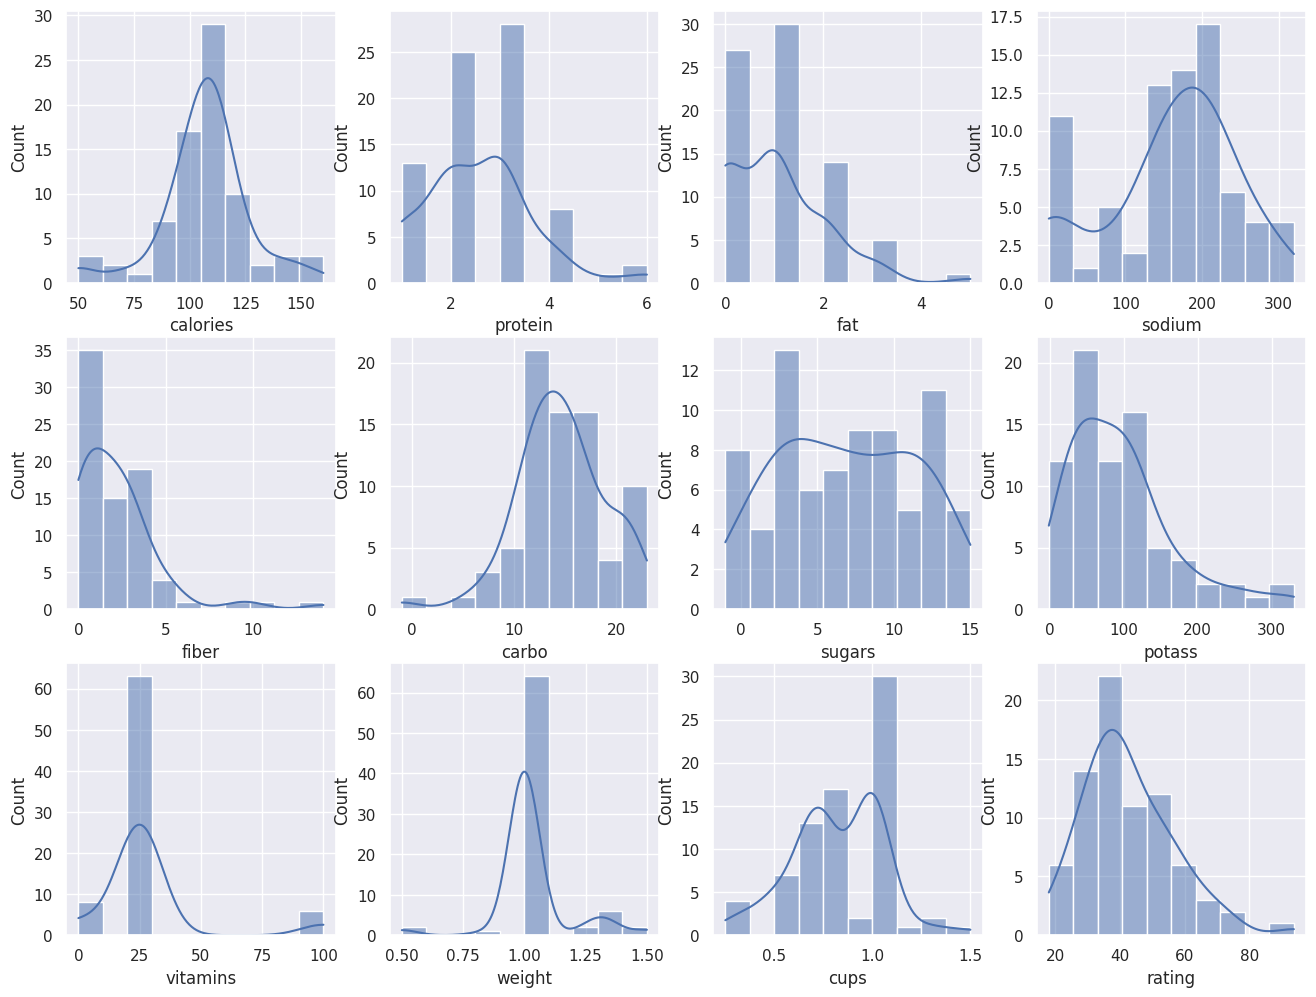

In [25]:
fig,axs = plt.subplots(3,4, figsize = (16, 12))
distribution_plot("calories", 0, 0)
distribution_plot("protein", 0, 1)
distribution_plot("fat", 0, 2)
distribution_plot("sodium", 0, 3)
distribution_plot("fiber", 1, 0)
distribution_plot("carbo", 1, 1)
distribution_plot("sugars", 1, 2)
distribution_plot("potass", 1, 3)
distribution_plot("vitamins", 2, 0)
distribution_plot("weight", 2, 1)
distribution_plot("cups", 2, 2)
distribution_plot("rating", 2, 3)
fig.tight_layout

What causes the ratings

In [14]:
# plot a pairwise correlation between ratings and other variables
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


<Axes: >

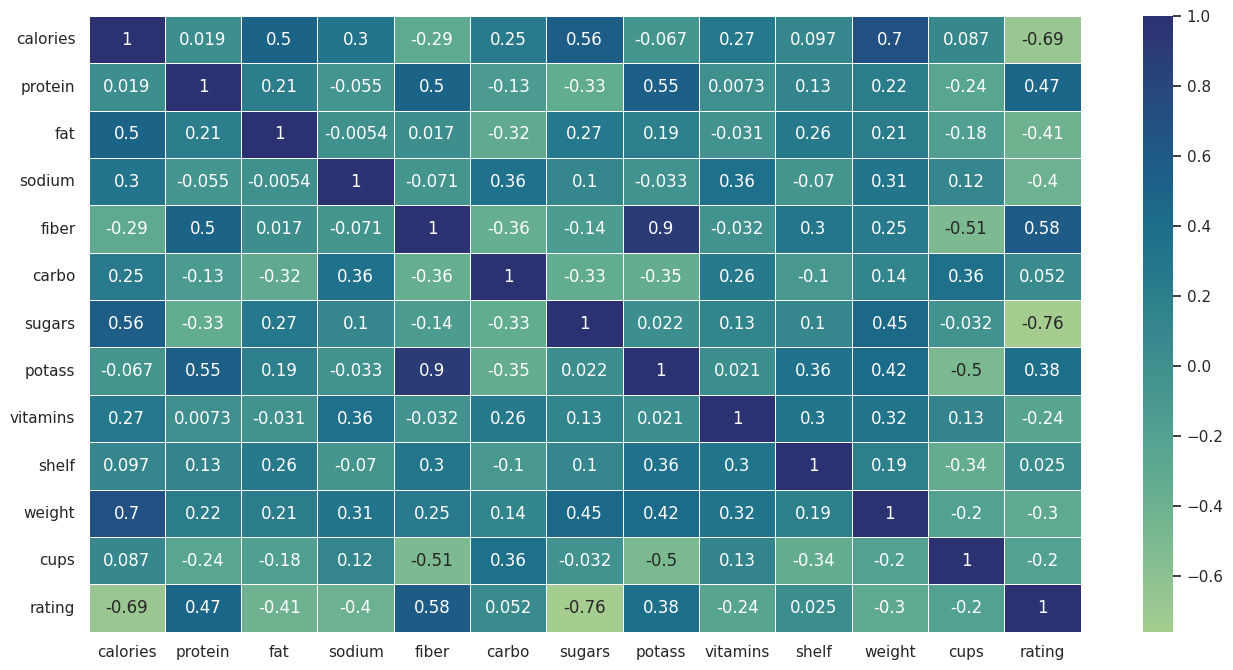

In [40]:
cereal_df_4_corr = cereal_df.drop(['name', 'mfr', 'type'], axis = 1)
corr_matrix = cereal_df_4_corr.corr()

plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap="crest")

<Axes: >

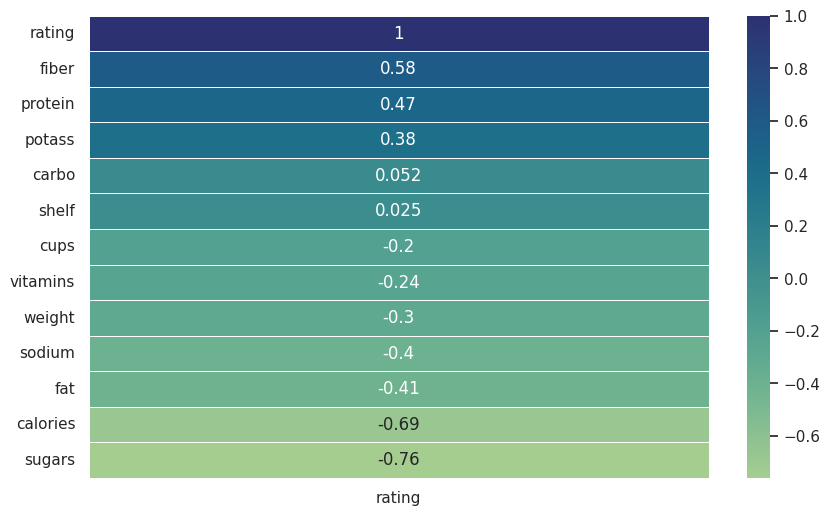

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['rating']].sort_values(by='rating', ascending=False), annot=True, linewidth=.5, cmap="crest")

This shows that fiber, protein, and potassium are the most significant features in determining higher rating and sodium, fat, calories, and sugars are the most significant features for lower ratings

In [32]:
cereal_df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [42]:
focused_features = cereal_df[['name', 'mfr', 'type', 'fiber', 'protein', 'potass', 'sodium', 'fat', 'calories','sugars', 'weight', 'rating']]
focused_features.head()

,name,mfr,type,fiber,protein,potass,sodium,fat,calories,sugars,weight,rating
0,100% Bran,Nabisco,C,10.0,4,280,130,1,70,6,1.0,68.402973
1,100% Natural Bran,Quaker Oats,C,2.0,3,135,15,5,120,8,1.0,33.983679
2,All-Bran,Kelloggs,C,9.0,4,320,260,1,70,5,1.0,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,14.0,4,330,140,0,50,0,1.0,93.704912
4,Almond Delight,Ralston Purina,C,1.0,2,-1,200,2,110,8,1.0,34.384843


### **Way to go**
Categorize cereals into healthy and unhealthy based on standard nutritional attributes

Perform manufacturer's analysis by masking out each manufacturer and see the trends in their products, then categorize which of them is producing healthy cereals and which of then is producing unhealthy cereals

Explore the possibility of building a model.
